Here's a JavaScript example of using the Client Credentials grant type.

We'll use the [client-oauth2](https://www.npmjs.com/package/client-oauth2) and
[request](https://www.npmjs.com/package/request) libraries.

In [ ]:
var ClientOAuth2 = require('client-oauth2');
var request = require("request");

The credentials come from the AnyPoint API Developer Console:

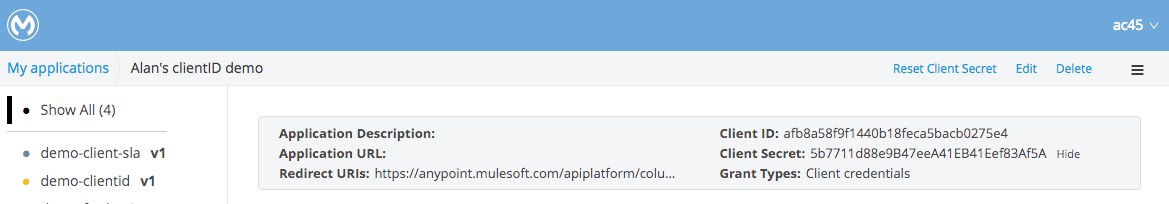

In [ ]:
var credentials = {
    "client_id": "afb8a58f9f1440b18feca5bacb0275e4",
    "client_secret": "5b7711d88e9B47eeA41EB41Eef83Af5A"
}

Since this is the Client Credentials grant type, we only care about the access token URI and required scopes.

In [ ]:
var auth = new ClientOAuth2({
  clientId: credentials.client_id,
  clientSecret: credentials.client_secret,
  accessTokenUri: 'https://oauth.cc.columbia.edu/as/token.oauth2',
  scopes: ['read']
})

Here's all you need to do in order to get the access token:

In [ ]:
var token = ''
auth.credentials.getToken()
  .then(function (user) {
    console.log(user) //=> { accessToken: '...', tokenType: 'bearer', ... }
    token = user.accessToken;
  })

In [ ]:
console.log(token)

Now that we have the token, the client can actually get to work:

In [ ]:
var options = { method: 'GET',
  url: 'https://columbia-demo-clientid.cloudhub.io/v1/api/stuff',
  headers: 
   { 
     'cache-control': 'no-cache',
     authorization: 'Bearer ' + token
   } };

In [ ]:
options

In [ ]:
request(options, function (error, response, body) {
  if (error) throw new Error(error);

  console.log(body);
});
